# Creating an SVC Machine Learning Classifier

**Here, me make an SVC (Support Vector Classification) model to predict a song's genre based on various features.**

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

**To begin, we combined the features that were obtained from our data collection phase, merging them all into a single data frame (songs).**

In [2]:
given = pickle.load(open("cleanedData.pkl", "rb"))
audio_analysis = pickle.load(open("audio_analysis_df.pkl", "rb"))
key_analysis = pickle.load(open("key_analysis_df.pkl", "rb"))
lengths_df = pickle.load(open("lengths_df.pkl", "rb"))
songs = pd.concat([given, audio_analysis, key_analysis, lengths_df], axis=1)

**Below, we can see all of the features available to us from the concatination of the various original data frames.**

In [3]:
songs.columns

Index(['artist', 'genre', 'lyrics', 'num_syllables', 'pos', 'year',
       'fog_index', 'flesch_index', 'num_words', 'num_lines', 'title',
       'f_k_grade', 'difficult_words', 'num_dupes', 'neg', 'neu', 'compound',
       'id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'uri',
       'analysis_url', 'artist_with_features', 'year_bin', 'image', 'cluster',
       'Gender', 'duration_avg', 'loudness_end_avg', 'loudness_max_avg',
       'loudness_max_time_avg', 'loudness_start_avg', 'key_changes',
       'num_sections', 'num_segments'],
      dtype='object')

**Here, we select a group of features we believe would be good predictors of genere in a classifier.  Various combinations of features were experimented with to obtain the list below, as well as insight gained from the data visualization steps conducted previously.  We also obtain the data we will use as the y-training feature (genre).**

In [4]:
features = ['genre', 'lyrics', 'num_words', 'num_lines',
       'num_dupes', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 
            'year_bin', 'duration_avg', 'loudness_end_avg', 'loudness_max_avg',
       'loudness_max_time_avg', 'loudness_start_avg', 'key_changes',
       'num_sections', 'num_segments']

**Next, we generated a new data frame that is a subset of the songs dataframe, extracting our features of interest, and the y-training data (genres).  We also drop na values so as to avoid error and not use songs with incomplete feature sets.**

In [5]:
data = songs[features].dropna()

**We created the x-training set and y-training set, currently ignoring lyrics from the x-training set.**

In [6]:
X_train = data.drop(["lyrics","genre"], axis=1)
y_train = data["genre"]

**Now with the x-training set and y-training set, we made our first SVC model that creates dummy variables from the categorical labels, scales all variables, and checks the effectiveness of this model with cross validation.  This is displayed by finding the overall accuracy of the model with respect to all classes, as well as the f1 score, precision and recall for the rock genre class.**

In [7]:
X_dict = X_train.to_dict(orient="records")
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

model = SVC()
    
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("model", model)])
    
is_rock_train = (y_train=="rock")

accuracy = cross_val_score(pipeline,
                        X_dict,
                        y_train,
                        cv=10, scoring="accuracy").mean()

f1 = cross_val_score(pipeline,
                        X_dict,
                        is_rock_train,
                        cv=10, scoring="f1").mean()

precision = cross_val_score(pipeline,
                        X_dict,
                        is_rock_train,
                        cv=10, scoring="precision").mean()
recall = cross_val_score(pipeline,
                        X_dict,
                        is_rock_train,
                        cv=10, scoring="recall").mean()

In [8]:
accuracy

0.55941842999867952

In [9]:
f1

0.61481478937643697

In [10]:
recall

0.65294164477350536

In [11]:
precision

0.69260525361804359

**This model was fairly effective, however we wanted to find out if we could generate an even better one.  Would using lyrics in the prediction imporve the various measures of accuracy?  Furthermore would using PCA (Principle Component Analysis), another form of measurement which we researchd, help our model?  To answer this question, we created another Support Vector Classification model that performed a TF-IDF analysis on the words in all songs and used this as another feature, as well as performed a PCA (with 2 components) on the data.**

**First we wanted to see how using the `max_df` parameter in the`TfidfVectorizer` would effect our predictions.**

In [12]:
lyrics = data["lyrics"].replace("\n", " ")
vector = TfidfVectorizer(norm=None, max_df = 1, stop_words={"english"}, lowercase=True) # Do not normalize.
vector.fit(lyrics) # This determines the vocabulary.
tf_idf_sparse = vector.transform(lyrics)
lyrics = pd.DataFrame(tf_idf_sparse.todense())
lyrics.columns = vector.vocabulary_
df_features = data.drop(["lyrics","genre"], axis=1).reset_index().drop("index", axis=1)

X_train_with_lyrics = pd.concat([df_features, lyrics], axis = 1, sort=False)
y_train = data["genre"]

**The words vectorized from the TF-IDF vectorizer.**

In [13]:
lyrics.head()

,blamed,strangeness,gypsies,owens,gallop,chester,conn,deee,sirree,ramble,...,founded,oppression,acceptance,ignores,synonymous,anointed,voiceless,uncles,plagued,prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_dict = X_train_with_lyrics.to_dict(orient="records")
vec = DictVectorizer(sparse=False)
vec.fit(X_dict)
X_dict = vec.transform(X_dict)
scaler = StandardScaler()
pca = PCA(n_components=2)
model = SVC()
    
pipeline = Pipeline([("scaler", scaler), ("pca", pca), ("model", model)])
    
is_rock_train = (y_train=="rock")
    
f1 = cross_val_score(pipeline,
                        X_dict,
                        is_rock_train,
                        cv=10, scoring="f1").mean()

In [15]:
f1

0.046524064171122995

**As we can see, using `max_df` made our prediction really bad.**

**Finally, we decided to optimize the `min_df` parameter passed into the TF-IDF vectorizer.  This sets a lower bound to the words that are chosen in the TF-IDF vectorizer (very common words chosen too often are not included )**

In [16]:
def optimal_m(m):
    # Quantify the lyrics
    lyrics = data["lyrics"].replace("\n", " ")
    vector = TfidfVectorizer(norm=None, min_df = m, stop_words={"english"}, lowercase=True) # Do not normalize.
    vector.fit(lyrics) # This determines the vocabulary.
    tf_idf_sparse = vector.transform(lyrics)
    lyrics = pd.DataFrame(tf_idf_sparse.todense())
    lyrics.columns = vector.vocabulary_
    
    # Use the features that we would like
    df_features = data.drop(["lyrics","genre"], axis=1).reset_index().drop("index", axis=1)
    
    # Create X_train and y_train
    X_train = pd.concat([df_features, lyrics], axis = 1, sort=False)
    y_train = data["genre"]
    
    # Vectorize the categorical variables
    X_dict = X_train.to_dict(orient="records")
    vec = DictVectorizer(sparse=False)
    # Create Scaler, PCA, and SVC objects
    scaler = StandardScaler()
    pca = PCA(n_components=6)
    model = SVC()
  
    # Construct the pipeline
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler),("pca", pca), ("model", model)])
    is_rock_train = (y_train=="rock")
    # Run 10 fold cross validation to calculate the f1 score
    f1 = cross_val_score(pipeline,
                        X_dict,
                        is_rock_train,
                        cv=10, scoring="f1").mean()
    print(m, " : ", f1)
    return(f1)
    #Using TfidifVectorizer because it ranks non common words as higher
    

In [17]:
ms = pd.Series(list([0.01, 0.02, 0.03,0.1, 0.2]))
ms.index=[0.01, 0.02, 0.03,0.1, 0.2]


In [18]:
test = ms.apply(optimal_m)

0.01  :  0.636897024509
0.02  :  0.640655928588
0.03  :  0.633785902425
0.1  :  0.622529403278
0.2  :  0.635098755094


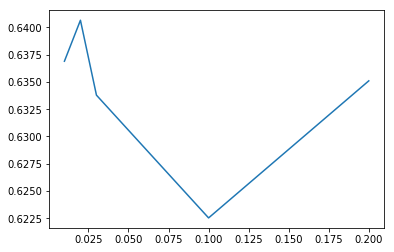

In [19]:
%matplotlib inline
test.plot.line()

In [20]:
test.sort_values(ascending=False)

0.02    0.640656
0.01    0.636897
0.20    0.635099
0.03    0.633786
0.10    0.622529
dtype: float64

**For the values that we have tested, the best value for m was 0.02.**